In [ ]:
''''Assignment #4
Rezwan-Ul-Alam (ID: 2011659042)
Md. Nur Alam Jowel (ID: 2012355042)
Raian Ruku (ID: 2013409642)'''

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/data/DT-BrainCancer.csv')
df.head()

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1


# Data Visualization & Preprocessing

In [4]:
print("Shape of the Data: ", df.shape )

Shape of the Data:  (88, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     int64  
 5   gtv         88 non-null     float64
 6   status      88 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ KB


In [6]:
df['ki'] = df['ki'].astype('float64')
df['status'] = df['status'].astype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     float64
 5   gtv         88 non-null     float64
 6   status      88 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.9+ KB


In [8]:
df.drop(df.columns[0], axis=1, inplace=True)

In [9]:
df.head()

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90.0,6.11,0.0
1,Male,HG glioma,Supratentorial,90.0,19.35,1.0
2,Female,Meningioma,Infratentorial,70.0,7.95,0.0
3,Female,LG glioma,Supratentorial,80.0,7.61,1.0
4,Male,HG glioma,Supratentorial,90.0,5.06,1.0


In [10]:
for column in df.columns:
    total = df[column].isnull().sum()
    print(f"Column '{column}' has {total} null values")
    print("\n")

Column 'sex' has 0 null values


Column 'diagnosis' has 1 null values


Column 'loc' has 0 null values


Column 'ki' has 0 null values


Column 'gtv' has 0 null values


Column 'status' has 0 null values




In [11]:
df.dropna(subset=['diagnosis'], inplace=True)
print("Number of null values in 'diagnosis' column after dropping:", df['diagnosis'].isnull().sum())

Number of null values in 'diagnosis' column after dropping: 0


In [12]:
print(df['loc'].value_counts())
print(df['sex'].value_counts())
print(df['diagnosis'].value_counts())

loc
Supratentorial    68
Infratentorial    19
Name: count, dtype: int64
sex
Female    45
Male      42
Name: count, dtype: int64
diagnosis
Meningioma    42
HG glioma     22
Other         14
LG glioma      9
Name: count, dtype: int64


# Label Encoding & One Hot Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_enc=LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])
df['loc'] = label_enc.fit_transform(df['loc'])
df['diagnosis'] = label_enc.fit_transform(df['diagnosis'])

In [15]:
'''one_hot_enc = OneHotEncoder(sparse_output=False, drop='first')
diagnosis_encoded = one_hot_enc.fit_transform(df[['diagnosis']])
diagnosis_categories = one_hot_enc.categories_[0]
diagnosis_columns = [f'diagnosis_{category}' for category in diagnosis_categories[1:]]
diagnosis_df = pd.DataFrame(diagnosis_encoded, columns=diagnosis_columns)
df = pd.concat([df, diagnosis_df], axis=1)'''

In [16]:
#df.dropna(inplace = True)

In [14]:
for column in df.columns:
    total = df[column].isnull().sum()
    print(f"Column '{column}' has {total} null values")
    print("\n")

Column 'sex' has 0 null values


Column 'diagnosis' has 0 null values


Column 'loc' has 0 null values


Column 'ki' has 0 null values


Column 'gtv' has 0 null values


Column 'status' has 0 null values




In [15]:
df.head()

,sex,diagnosis,loc,ki,gtv,status
0,0,2,0,90.0,6.11,0.0
1,1,0,1,90.0,19.35,1.0
2,0,2,0,70.0,7.95,0.0
3,0,1,1,80.0,7.61,1.0
4,1,0,1,90.0,5.06,1.0


In [19]:
#df.reset_index(drop=True, inplace=True)

In [20]:
#df = df[['sex', 'diagnosis', 'loc', 'ki', 'gtv', 'diagnosis_LG glioma', 'diagnosis_Meningioma', 'diagnosis_Other', 'status']]


In [21]:
#df.drop('diagnosis', axis=1, inplace=True)
df.head()

,sex,loc,ki,gtv,diagnosis_LG glioma,diagnosis_Meningioma,diagnosis_Other,status
0,0.0,0.0,90.0,6.11,0.0,1.0,0.0,0.0
1,1.0,1.0,90.0,19.35,0.0,0.0,0.0,1.0
2,0.0,0.0,70.0,7.95,0.0,1.0,0.0,0.0
3,0.0,1.0,80.0,7.61,1.0,0.0,0.0,1.0
4,1.0,1.0,90.0,5.06,0.0,0.0,0.0,1.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   86 non-null     float64
 1   loc                   86 non-null     float64
 2   ki                    86 non-null     float64
 3   gtv                   86 non-null     float64
 4   diagnosis_LG glioma   86 non-null     float64
 5   diagnosis_Meningioma  86 non-null     float64
 6   diagnosis_Other       86 non-null     float64
 7   status                86 non-null     float64
dtypes: float64(8)
memory usage: 5.5 KB


In [27]:
df.shape

(86, 8)

# Data Split 70% 15% 15%

In [16]:
X = df.iloc[:,:5]
y = df.iloc[:, 5]

print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (87, 5)
Shape of y:  (87,)


In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of y_val: ", y_val.shape)
print("shape of y_test: ", y_test.shape)

Shape of X_train:  (60, 5)
Shape of X_val:  (13, 5)
Shape of X_test:  (14, 5)
Shape of y_train:  (60,)
shape of y_val:  (13,)
shape of y_test:  (14,)


# MinMax Scaler

In [18]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



# Standard Scaler

In [25]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Evaluation matrics Functions

In [19]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [20]:
def calculate_precision(y_true, y_pred, label):
    true_positives = sum((y_true == label) & (y_pred == label))
    predicted_positives = sum(y_pred == label)
    if predicted_positives > 0:
      precision = true_positives / predicted_positives
    else :0
    return precision

In [21]:
def calculate_recall(y_true, y_pred, label):
    true_positives = sum((y_true == label) & (y_pred == label))
    actual_positives = sum(y_true == label)
    if actual_positives > 0:
      recall = true_positives / actual_positives
    else :0
    return recall

In [22]:
def calculate_f1_score(precision, recall):
    if (precision + recall) > 0 :
      f1_score = 2 * (precision * recall) / (precision + recall)
    else :0
    return f1_score

In [23]:
def calculate_confusion_matrix(y_true, y_pred):
    unique_labels = sorted(set(y_true) | set(y_pred))
    num_labels = len(unique_labels)
    confusion_matrix = [[0] * num_labels for _ in range(num_labels)]

    label_to_index = {label: i for i, label in enumerate(unique_labels)}

    for true_label, pred_label in zip(y_true, y_pred):
        true_index = label_to_index[true_label]
        pred_index = label_to_index[pred_label]
        confusion_matrix[true_index][pred_index] += 1

    return confusion_matrix


# Hyperparameter tuning using validation set for Decision Tree

In [24]:
# Hyperparameter tuning using validation set for Decision Tree
best_accuracy = 0
best_depth = 1

for max_depth in range(1, 11):

    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Train
    dt_classifier.fit(X_train_scaled, y_train)

    y_val_pred_tree = dt_classifier.predict(X_val_scaled)

    accuracy = calculate_accuracy(y_val, y_val_pred_tree)
    print(f"depth {max_depth} , accuracy{accuracy}")
    # Check if the current model is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = max_depth

print("Best max_depth for Decison Tree:", best_depth)
print("Best validation accuracy for Decision Tree:", best_accuracy)

depth 1 , accuracy0.6923076923076923
depth 2 , accuracy0.8461538461538461
depth 3 , accuracy0.8461538461538461
depth 4 , accuracy0.6153846153846154
depth 5 , accuracy0.6153846153846154
depth 6 , accuracy0.6923076923076923
depth 7 , accuracy0.6923076923076923
depth 8 , accuracy0.6923076923076923
depth 9 , accuracy0.6923076923076923
depth 10 , accuracy0.6923076923076923
Best max_depth for Decison Tree: 2
Best validation accuracy for Decision Tree: 0.8461538461538461


In [25]:
final_dt_classifier = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_dt_classifier.fit(X_train_scaled, y_train)
y_test_pred = final_dt_classifier.predict(X_test_scaled)
test_accuracy_tree = calculate_accuracy(y_test, y_test_pred)
print("Decision Tree Test accuracy with best hyperparameters: ",test_accuracy_tree)

Decision Tree Test accuracy with best hyperparameters:  0.8571428571428571


In [26]:
# Initialize empty lists to store Precision, Recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []
unique_labels = set(y_test) | set(y_test_pred)
for label in unique_labels:
    precision = calculate_precision(y_test, y_test_pred, label)
    recall = calculate_recall(y_test, y_test_pred, label)
    f1_score = calculate_f1_score(precision, recall)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
for i, label in enumerate(unique_labels):
    print(f"Class {label}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1-score: {f1_scores[i]}")


Class 0.0:
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-score: 0.8888888888888888
Class 1.0:
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002


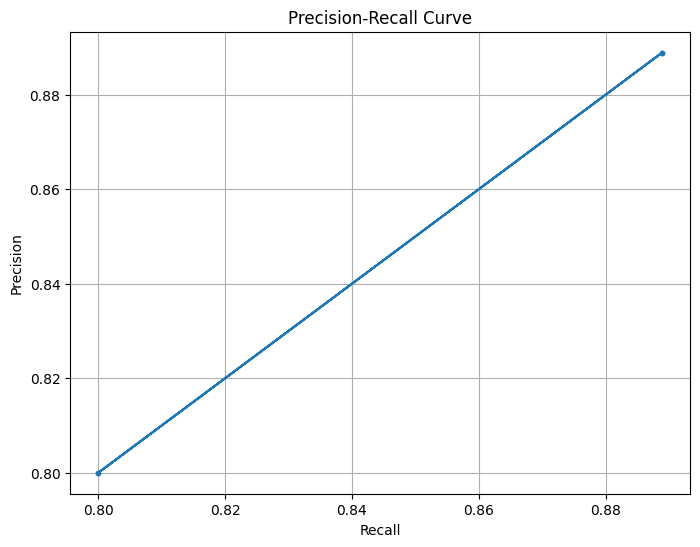

In [27]:

for label in unique_labels:
    true_positives = sum((y_test == label) & (y_test_pred == label))
    predicted_positives = sum(y_test_pred == label)
    actual_positives = sum(y_test == label)

    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0

    if actual_positives > 0:
        recall = true_positives / actual_positives
    else:
        recall = 0

    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [28]:
conf_matrix = calculate_confusion_matrix(y_test, y_test_pred)
print("Decision tree Confusion Matrix:")
for row in conf_matrix:
    print(row)

Decision tree Confusion Matrix:
[8, 1]
[1, 4]


# Hyperparameter tuning using validation set for XGBoost

In [29]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
best_accuracy = 0
best_parameters = {}
#different hyperparameters
max_dept = [1,2,3,4,5,6,7,8,9,10]
learning_rat = [0.1, 0.01, 0.001]
n_estimator = [50, 100, 150, 200]
for max_depth in max_dept:
    for learning_rate in learning_rat:
        for n_estimators in n_estimator:
            # Set hyperparameters
            xgb_classifier.set_params(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators)

            # Train the classifier on the training data
            xgb_classifier.fit(X_train_scaled, y_train)

            # Predict using validation data
            y_val_pred_XGB = xgb_classifier.predict(X_val_scaled)

            # Calculate accuracy
            accuracy = calculate_accuracy(y_val, y_val_pred_XGB)
            print(accuracy)
            # Check if the current model is the best
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters['max_depth'] = max_depth
                best_parameters['learning_rate'] = learning_rate
                best_parameters['n_estimators'] = n_estimators

print("Best hyperparameters for XGB:", best_parameters)
print("Best validation accuracy for XGB:", best_accuracy)

0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.7692307692307693
0.7692307692307693
0.8461538461538461
0.8461538461538461
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.8461538461538461
0.6923076923076923
0.7692307692307693
0.7692307692307693
0.8461538461538461
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.7692307692307693
0.8461538461538461
0.8461538461538461
0.8461538461538461
0.6923076923076923
0.7692307692307693
0.8461538461538461
0.8461538461538461
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.6923076923076923
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.7692307692307693
0.6923076923

In [30]:
xgb_classifier.set_params(**best_parameters)
xgb_classifier.fit(X_train_scaled, y_train)
# Evaluate the model on the test set
y_test_pred = xgb_classifier.predict(X_test_scaled)
test_accuracy_XGB = calculate_accuracy(y_test, y_test_pred)
print("XGBoost Test accuracy with best hyperparameters: ",test_accuracy_XGB)

XGBoost Test accuracy with best hyperparameters:  0.8571428571428571


In [31]:
# Initialize empty lists to store Precision, Recall, and F1-score for each class
precisions = []
recalls = []
f1_scores = []
unique_labels = set(y_test) | set(y_test_pred)
for label in unique_labels:
    precision = calculate_precision(y_test, y_test_pred, label)
    recall = calculate_recall(y_test, y_test_pred, label)
    f1_score = calculate_f1_score(precision, recall)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
for i, label in enumerate(unique_labels):
    print(f"Class {label}:")
    print(f"Precision: {precisions[i]}")
    print(f"Recall: {recalls[i]}")
    print(f"F1-score: {f1_scores[i]}")


Class 0.0:
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1-score: 0.8888888888888888
Class 1.0:
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002


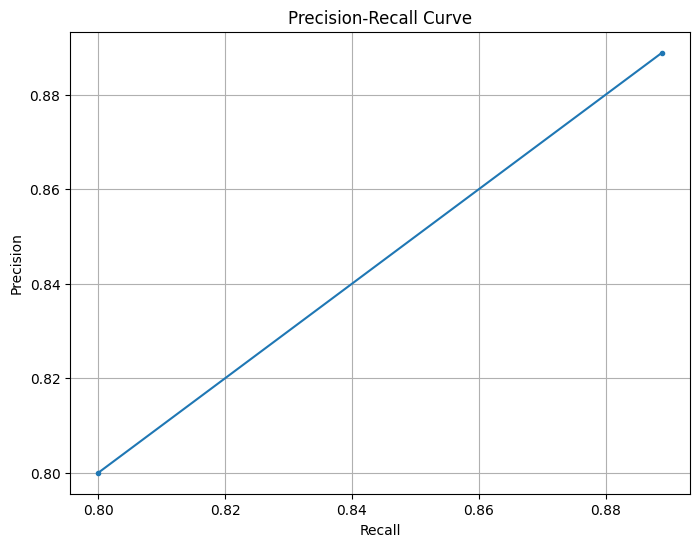

In [32]:
# Initialize empty lists to store Precision and Recall
precisions = []
recalls = []

# Calculate Precision and Recall for each label separately
for label in unique_labels:
    true_positives = sum((y_test == label) & (y_test_pred == label))
    predicted_positives = sum(y_test_pred == label)
    actual_positives = sum(y_test == label)

    if predicted_positives > 0:
        precision = true_positives / predicted_positives
    else:
        precision = 0

    if actual_positives > 0:
        recall = true_positives / actual_positives
    else:
        recall = 0

    precisions.append(precision)
    recalls.append(recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [33]:
conf_matrix = calculate_confusion_matrix(y_test, y_test_pred)
print("Decision tree Confusion Matrix:")
for row in conf_matrix:
    print(row)

Decision tree Confusion Matrix:
[8, 1]
[1, 4]


In [35]:
file_path = '/content/gdrive/MyDrive/data/processed_dataset_brain_cancer_with_label_encoding.xlsx'
df.to_excel(file_path, index=False)